In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
import  collections
from operator import itemgetter
import random
import os
import seaborn as sns

plt.rcParams['savefig.facecolor'] = 'white'

Using **left** parties dataset

In [2]:
nodes_df = pd.read_csv('subsets/NODES_sinistra.csv', low_memory=False)
edges_df = pd.read_csv('subsets/EDGES_sinistra_adjacent.csv', low_memory=False)
subset_str  = 'LEFT'

Using **right** parties dataset

In [70]:
nodes_df   = pd.read_csv('subsets/NODES_destra.csv', low_memory=False)
edges_df   = pd.read_csv('subsets/EDGES_destra_adjacent.csv', low_memory=False)
subset_str = 'RIGHT'

Cell above to select the proper dataset

In [3]:
nodes_df

,id,label,counts,counts_hate,counts_prob,counts_pos,polarity,Emo_Neg,Ansia,Rabbia,Tristez,parolac
0,0,giornalista,243,1,21,97,-1.000000,0.0,0.0,0.0,0.0,0.0
1,1,lecchina,2,0,2,0,0.251332,0.0,0.0,0.0,0.0,0.0
2,2,salvare,190,0,13,84,1.000000,0.0,0.0,0.0,0.0,0.0
3,3,bruciare,79,1,5,37,-1.000000,0.0,0.0,0.0,0.0,0.0
4,4,ano,2,0,1,1,-0.644713,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29504,29505,ilegale,1,0,0,0,-0.288769,0.0,0.0,0.0,0.0,0.0
29505,29506,scappereccio,1,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0
29506,29507,sconfiggerlo,1,0,0,0,-1.000000,0.0,0.0,0.0,0.0,0.0
29507,29508,luomo,1,0,0,0,1.000000,0.0,0.0,0.0,0.0,0.0


In [4]:
edges_df.dropna()

,source,target,weight
0,0,1296,1
1,0,1297,1
2,0,1991,1
3,0,122,6
4,0,17,2
...,...,...,...
210173,29442,29443,1
210174,29456,29457,1
210175,29459,29460,1
210176,29481,29482,1


**Creating NetworkX Graph object**

In [5]:
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', ['weight'])
data = nodes_df.set_index('id').to_dict('index').items()

In [6]:
G.add_nodes_from(data)

Printing some Graph information

In [7]:
#Checking if the edges and nodes were added successfully
print(nx.info(G)) # Print information about the Graph

Name: 
Type: Graph
Number of nodes: 29510
Number of edges: 210178
Average degree:  14.2445


###Some Network Statistics below can be done using Gephi while others are more flexible to try in Python

 ### **PART ONE:** Metrics Related to the network structure (Density, Transitivity)

**DENSITY**

In [8]:
#Overall Density of the network
density = nx.density(G)
print("Network density:", density)

Network density: 0.0004827180615706568


This **Density** value just means that our network is weakly connected, this is predictable since we are dealing with a huge network.

**Assortativity**

In [10]:
assort = nx.degree_assortativity_coefficient(G)
print("Network assortativity:", assort)

Network assortativity: -0.10637897317889355


## TAKES TOO MUCH, DO NOT RUN

**TRANSITIVITY**

In [7]:
# #Overall Density of the network
# transitivity = nx.transitivity(G)
# print("Network transitivity:", transitivity)

**Transitivity** is just a way to measure triadic closure, teh value we get tells us how the nodes are interconnected. This suggest that we should look more into the importance of each node(degrees, centrality, page rank etc..) using the metrics in PART 2. 

### **PART TWO:** Metrics Related to the importance of each node
In this section we add new attributes to each node depending on its centrality, degree...

**DEGREES** : Create **degrees dictionary**, mapping each word to their respective degrees. 

In [16]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
#It is important to set degree as an attribute of node alongside the other attributes 

In [17]:
#Sorting in desceding order (this will be important if we want to use nodes removal)
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
labels_dict   = nx.get_node_attributes(G,'label')

In [18]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by degree:
(78, 1627) sempre
(202, 1598) fare
(122, 1515) politico
(463, 1461) partire
(128, 1458) parlare
(269, 1427) pd
(342, 1331) quando
(374, 1288) potere
(17, 1281) salvini
(132, 1278) anno
(237, 1271) dire
(46, 1268) italiano
(268, 1231) italia
(280, 1207) votare
(34, 1204) governare
(83, 1170) lavorare
(435, 1119) grande
(353, 1094) persona
(379, 1036) bene
(338, 1027) grazia


In [11]:
hate_index_dict = nx.get_node_attributes(G,'counts_hate')
sorted_hate_index = sorted(hate_index_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by hate_index:")
for d in sorted_hate_index[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by hate_index:
(46, 12) italiano
(78, 10) sempre
(26, 9) merda
(414, 9) paese
(122, 8) politico
(1165, 8) vergognare
(249, 7) cazzo
(17, 6) salvini
(268, 6) italia
(379, 6) bene
(42, 6) vivere
(536, 6) fascista
(1028, 6) patrio
(1304, 6) coglione
(73, 6) feccia
(3909, 6) islamico
(132, 5) anno
(202, 5) fare
(237, 5) dire
(512, 5) volere


In [12]:
hate_polar_dict = nx.get_node_attributes(G,'polarity')
sorted_hate_polar = sorted(hate_polar_dict.items(), key=itemgetter(1), reverse=False)
print("Top 20 nodes by polarity:")
for d in sorted_hate_polar[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by polarity:
(0, -1.0) giornalista
(3247, -1.0) chiamalo
(3201, -1.0) vergognoso
(4412, -1.0) servo
(6427, -1.0) telecamera
(83, -1.0) lavorare
(3379, -1.0) conduttore
(8884, -1.0) invitato
(4283, -1.0) infastidire
(285, -1.0) girare
(6270, -1.0) sportivo
(269, -1.0) pd
(2104, -1.0) paolo
(26, -1.0) merda
(766, -1.0) ancor
(45, -1.0) citta
(1127, -1.0) via
(137, -1.0) cavalcare
(1554, -1.0) audience
(2639, -1.0) internazionale


## Degree Distribution plots ( LOG SCALE) and fit for gamma

In [11]:
def plot_degree_histogram(g, normalized=True):

    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y


def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35, normalized = False):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)
    
    keys   = np.asarray([*counter_dict.keys()])
    values = np.asarray([*counter_dict.values()])

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(keys,bins,weights=values)[0] / np.histogram(keys,bins)[0])
    bin_means_x = (np.histogram(keys,bins,weights=keys)[0] / np.histogram(keys,bins)[0])

    if (normalized == True):
        total = 0.
        for i in range(bin_count - 1):
            total += bin_means_y[i]*(bin_means_x[i])
        
        bin_means_y /= total
        
    return bin_means_x, bin_means_y

Creating histogram...


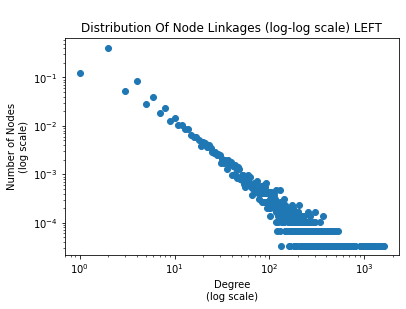

In [12]:
aux_x , aux_y = plot_degree_histogram(G, normalized=True)
plt.title('\nDistribution Of Node Linkages (log-log scale) ' + subset_str )
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")

plt.plot(aux_x, aux_y, 'o')
plt.savefig('AO.png')

## Fit and compute gamma

In [20]:
ba_c2 = dict(collections.Counter(degree_dict.values()))
ba_x,ba_y = log_binning(ba_c2, 5, True)

In [21]:
1.5e3

1500.0

In [22]:
k_min = 1e1
number_nodes = len(nodes_df)

indexes_to_keep = [(ba_x >= k_min) & (ba_x <= 1.9e3)]
x = ba_x[tuple(indexes_to_keep)]
y = np.log10(ba_y[tuple(indexes_to_keep)])

gamma_param = np.polyfit(x, y, 1, full = True)
gamma =  gamma_param[0][1]


print("Gamma of the model is: ", gamma, "+-", np.sqrt(gamma_param[3][1]) )
print("Natural cutoff is: ", k_min*(number_nodes**(1./(-gamma-1.)) ) )

Gamma of the model is:  -2.957138572582327 +- 0.7244425611940766
Natural cutoff is:  1922.7523628305019


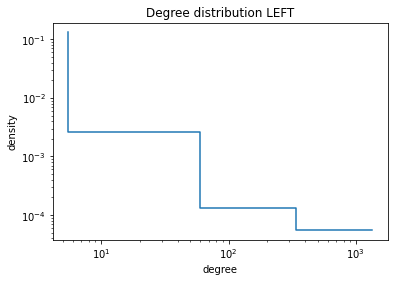

In [23]:

plt.step(ba_x, ba_y)
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('density')
plt.yscale('log')
plt.title('Degree distribution '+ subset_str)
plt.show()

## DO NOT RUN. IT TAKES TOO LONG

**Betweeness Centrality Dictionary**

It is quite informative to see what is the most central node in the network. This measure is more relevant because it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node.

In [24]:
# #Inspecting the centrality of each node --> important if we want to implement nodes removal
# betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
# nx.set_node_attributes(G, betweenness_dict, 'betweenness')

In [25]:
# sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
# print("Top 20 nodes by betweenness centrality:")
# for b in sorted_betweenness[:20]:
#     print(b)

Well, it is very expected that nodes with high degrees would have high centrality but it would be more interesting to see if there are any nodes with low degrees and high centrality. Below we append both attributes to investigate this hypothesis.

In [26]:
# #First get the top 20 nodes by betweenness as a list
# top_betweenness = sorted_betweenness[:20]

# #Then find and print their degree
# for tb in top_betweenness: # Loop through top_betweenness
#     degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree,
#     print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

**Pagerank score**

In [27]:
pagerank_dict = nx.pagerank(G, alpha=0.9)
nx.set_node_attributes(G, pagerank_dict, 'pagerank')

sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by pagerank:")
for b in sorted_pagerank[:20]:
    print(b, labels_dict.get(b[0]))

Top 20 nodes by pagerank:
(78, 0.004409731847352692) sempre
(202, 0.004257181639716843) fare
(122, 0.004143980538421866) politico
(269, 0.004107818419511075) pd
(463, 0.004021742695856366) partire
(128, 0.003881210319187496) parlare
(46, 0.003732616574544717) italiano
(132, 0.0036694264138395186) anno
(280, 0.003650483496989807) votare
(83, 0.0036089128155574186) lavorare
(435, 0.0034815018941592255) grande
(34, 0.0034609351756874573) governare
(342, 0.0034604568917742883) quando
(268, 0.0034331254883062374) italia
(17, 0.0034203524972674813) salvini
(374, 0.003168928622164936) potere
(237, 0.003090180688181975) dire
(338, 0.003011004940962522) grazia
(353, 0.0028865546896694886) persona
(379, 0.002729200560080121) bene


In [28]:
#First get the top 20 nodes by betweenness as a list
top_pagerank = sorted_pagerank[:20]

#Then find and print their degree
for t_pr in top_pagerank: # Loop through top_betweenness
    degree = degree_dict[t_pr[0]] # Use degree_dict to access a node's degree,
#     betweenness_node = betweenness_dict[t_pr[0]]
    print("Name:", labels_dict.get(t_pr[0]), "| Pagerank:", t_pr[1], 
#           "| Betweenness Centrality:", betweenness_node, 
          "| Degree:", degree,  )

Name: sempre | Pagerank: 0.004409731847352692 | Degree: 1627
Name: fare | Pagerank: 0.004257181639716843 | Degree: 1598
Name: politico | Pagerank: 0.004143980538421866 | Degree: 1515
Name: pd | Pagerank: 0.004107818419511075 | Degree: 1427
Name: partire | Pagerank: 0.004021742695856366 | Degree: 1461
Name: parlare | Pagerank: 0.003881210319187496 | Degree: 1458
Name: italiano | Pagerank: 0.003732616574544717 | Degree: 1268
Name: anno | Pagerank: 0.0036694264138395186 | Degree: 1278
Name: votare | Pagerank: 0.003650483496989807 | Degree: 1207
Name: lavorare | Pagerank: 0.0036089128155574186 | Degree: 1170
Name: grande | Pagerank: 0.0034815018941592255 | Degree: 1119
Name: governare | Pagerank: 0.0034609351756874573 | Degree: 1204
Name: quando | Pagerank: 0.0034604568917742883 | Degree: 1331
Name: italia | Pagerank: 0.0034331254883062374 | Degree: 1231
Name: salvini | Pagerank: 0.0034203524972674813 | Degree: 1281
Name: potere | Pagerank: 0.003168928622164936 | Degree: 1288
Name: dire | 

# NODE REMOVAL 

In this section we try to remove a set of nodes one by one to see how it affects the robustness of the network.

In [63]:
#return the two lists with the same length so to plot them in a single graph 
def pad_lists(list1, list2):
    
    x1_new = list1.copy()
    x2_new = list2.copy()
    
    length = max(len(x1_new), len(x2_new))
    
    if len(x1_new) == length:
        diff_length = length - len(x2_new)
        
        for i in range(diff_length):
            x2_new.append(None)
            
    if len(x2_new) == length:
        diff_length = length - len(x1_new)
        
        for i in range(diff_length):
            x1_new.append(None)        
            
    
    return x1_new, x2_new

In [64]:
pad_lists([0,1,2,3,4,5], [0,1])

([0, 1, 2, 3, 4, 5], [0, 1, None, None, None, None])

In [72]:
#list_density_L is the list that contains all densities of Left database for every timestep
#list_density_R is the list that contains all densities of Right database for every timestep
#node_type is a string that defines what kind of nodes are removed

def get_graph_node_removal(list_density_L, list_density_R, node_type, diff_degree = None):
    
    os.makedirs('images/', exist_ok = True)
    
    max_numb_iter = min([len(list_density_L), len(list_density_R)])
    
    #these new lists below length that is equal
    padded_L, padded_R = pad_lists(list_density_L, list_density_R)
    density_L_arr_padd = np.array(padded_L)
    density_R_arr_padd = np.array(padded_R)
    n_iter = len(density_L_arr_padd)
    
    density_L_arr = np.array(list_density_L)[:max_numb_iter]
    density_R_arr = np.array(list_density_R)[:max_numb_iter]
#     plt.plot(np.arange(max_numb_iter), density_L_arr, 'b-', label = 'LEFT')
#     plt.plot(np.arange(max_numb_iter), density_R_arr, 'r-', label = 'RIGHT')
    
    plt.plot(np.arange(n_iter), density_L_arr_padd, 'b-', label = 'LEFT')
    plt.plot(np.arange(n_iter), density_R_arr_padd, 'r-', label = 'RIGHT')
    plt.title("COMMENTS - Node removal by "+str(node_type))
    plt.ylabel("Density")
    plt.xlabel("Removed nodes")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('images/NodeRemoval_'+str(node_type)+'.png')
    plt.show()
    
    #diff R-L, usually R is denser than L
    diff_array = density_R_arr-density_L_arr
    plt.plot(np.arange(max_numb_iter), diff_array, 'k-', label = "by "+ str(node_type))
    if (diff_degree) and (len(diff_degree) >= max_numb_iter):
        plt.plot(np.arange(max_numb_iter), diff_degree[:max_numb_iter], 'k--', label = "by degree")
    plt.title("COMMENTS - Node removal by "+str(node_type))
    plt.ylabel("den(R) - den(L)")
    plt.xlabel("Removed nodes")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('images/NodeRemoval_'+str(node_type)+'_Diff.png')
    plt.show()
    
    #Relative value wrt initial value that is the max one
    density_L_arr_rel = np.array(list_density_L)/np.array(list_density_L)[0]
    density_R_arr_rel = np.array(list_density_R)/np.array(list_density_R)[0]
#     plt.plot(np.arange(max_numb_iter), density_L_arr_rel, 'b-', label = 'LEFT')
#     plt.plot(np.arange(max_numb_iter), density_R_arr_rel, 'r-', label = 'RIGHT')
    density_L_arr_padd_rel, density_R_arr_padd_rel = pad_lists(list(density_L_arr_rel), list(density_R_arr_rel))
    
    plt.plot(np.arange(n_iter), density_L_arr_padd_rel, 'b-', label = 'LEFT')
    plt.plot(np.arange(n_iter), density_R_arr_padd_rel, 'r-', label = 'RIGHT')
    plt.title("COMMENTS - Node removal by "+str(node_type))
    plt.ylabel("relative density")
    plt.xlabel("Removed nodes")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('images/NodeRemoval_'+str(node_type)+'_Relative.png')
    plt.show()

    #diff R-L normalized to the first difference, usually R is denser than L
    if (diff_degree):
        diff_first       = diff_degree[0]
    else:
        diff_first       = density_R_arr[0] - density_L_arr[0]
    diff_array_norm  = diff_array/diff_first
    plt.plot(np.arange(max_numb_iter), diff_array_norm, 'k-', label = "by "+ str(node_type))
    if (diff_degree) and (len(diff_degree) >= max_numb_iter):
        diff_degree_norm = np.array(diff_degree)/diff_first
        plt.plot(np.arange(max_numb_iter), diff_degree_norm[:max_numb_iter], 'k--', label = "by degree")
    plt.title("COMMENTS - Node removal by "+str(node_type))
    plt.ylabel("den(R) - den(L) [normalized]")
    plt.xlabel("Removed nodes")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('images/NodeRemoval_'+str(node_type)+'_Relative_norm.png')
    plt.show()

In [35]:
def write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                    selected_nodes_L, selected_nodes_R,
                    G_L, G_R, attribute):
    
    init_density_L = list_density_L[0]
    init_density_R = list_density_R[0]
    list_density_L = list_density_L[1:]
    list_density_R = list_density_R[1:]
    
    os.makedirs('dataframes_density/', exist_ok = True)

    dict_label_L     = nx.get_node_attributes(G_L, 'label' )
    dict_degree_L    = nx.get_node_attributes(G_L, 'degree' )
    dict_attribute_L = nx.get_node_attributes(G_L, str(attribute) )
    dict_label_R     = nx.get_node_attributes(G_R, 'label' )
    dict_degree_R    = nx.get_node_attributes(G_R, 'degree' )
    dict_attribute_R = nx.get_node_attributes(G_R, str(attribute) )
    
    timesteps = min([len(list_density_L), len(list_density_R)])
    columns   = ['node_L', 'density_L', 'delta_L' , 'degree_L', 'attr_L',
                 'node_R', 'density_R', 'delta_R' , 'degree_R', 'attr_R' ] 
    
    list_label_L     = [dict_label_L.get(i)for i in selected_nodes_L]
    list_degree_L    = [dict_degree_L.get(i)for i in selected_nodes_L]
    list_attribute_L = [dict_attribute_L.get(i)for i in selected_nodes_L]
    list_label_R     = [dict_label_R.get(i)for i in selected_nodes_R]
    list_degree_R    = [dict_degree_R.get(i)for i in selected_nodes_R]
    list_attribute_R = [dict_attribute_R.get(i)for i in selected_nodes_R]
    delta_L          = [list_density_L[1] - init_density_L]
    delta_R          = [list_density_R[1] - init_density_R]
    for i in range(1,timesteps):
        delta_L.append(list_density_L[i]-list_density_L[i-1])
    for i in range(1,timesteps):
        delta_R.append(list_density_R[i]-list_density_R[i-1])
    
    df = pd.DataFrame()
    df[columns[0]] = list_label_L[:timesteps]
    df[columns[1]] = list_density_L[:timesteps]
    df[columns[2]] = delta_L[:timesteps]
    df[columns[3]] = list_degree_L[:timesteps]
    df[columns[4]] = list_attribute_L[:timesteps]
    df[columns[5]] = list_label_R[:timesteps]
    df[columns[6]] = list_density_R[:timesteps]
    df[columns[7]] = delta_R[:timesteps]
    df[columns[8]] = list_degree_R[:timesteps]
    df[columns[9]] = list_attribute_R[:timesteps]
    
    df.to_csv('dataframes_density/'+str(attribute)+'.csv', index = False)
    
    return
    

# USING WHOLE NETWORK (deprecated)

In [36]:
# nodes_df_LEFT = pd.read_csv('subsets/NODES_sinistra.csv', low_memory=False)
# edges_df_LEFT = pd.read_csv('subsets/EDGES_sinistra_hate_subset.csv', low_memory=False)
# subset_str_L  = 'LEFT'
    
# nodes_df_RIGHT   = pd.read_csv('subsets/NODES_destra.csv', low_memory=False)
# edges_df_RIGHT   = pd.read_csv('subsets/EDGES_destra_hate_subset.csv', low_memory=False)
# subset_str_R     = 'RIGHT'
    
# G_L = nx.from_pandas_edgelist(edges_df_LEFT, 'source', 'target', ['weight'])
# G_R = nx.from_pandas_edgelist(edges_df_RIGHT, 'source', 'target', ['weight'])

# #add total negativity
# list_tot_neg_L = []
# list_tot_neg_R = []
# for i in range(len(nodes_df_LEFT)):
#     list_tot_neg_L.append(np.sum(nodes_df_LEFT.loc[i,['Emo_Neg', 'Rabbia', 'Ansia', 'Tristez', 'parolac']]))
# for i in range(len(nodes_df_RIGHT)):
#     list_tot_neg_R.append(np.sum(nodes_df_RIGHT.loc[i,['Emo_Neg', 'Rabbia', 'Ansia', 'Tristez', 'parolac']]))
# nodes_df_LEFT["Tot_Neg"] = list_tot_neg_L
# nodes_df_RIGHT["Tot_Neg"] = list_tot_neg_R    


# data_L = nodes_df_LEFT.set_index('id').to_dict('index').items()
# data_R = nodes_df_RIGHT.set_index('id').to_dict('index').items()

# G_L.add_nodes_from(data_L)
# G_R.add_nodes_from(data_R)

# str_title = "large_network_"

# USING ADJACENT NETWORK

In [37]:
nodes_df_LEFT = pd.read_csv('subsets/NODES_sinistra.csv', low_memory=False)
edges_df_LEFT = pd.read_csv('subsets/EDGES_sinistra_adjacent.csv', low_memory=False)
subset_str_L  = 'LEFT'
    
nodes_df_RIGHT   = pd.read_csv('subsets/NODES_destra.csv', low_memory=False)
edges_df_RIGHT   = pd.read_csv('subsets/EDGES_destra_adjacent.csv', low_memory=False)
subset_str_R     = 'RIGHT'
    
G_L = nx.from_pandas_edgelist(edges_df_LEFT, 'source', 'target', ['weight'])
G_R = nx.from_pandas_edgelist(edges_df_RIGHT, 'source', 'target', ['weight'])

#add total negativity
list_tot_neg_L = []
list_tot_neg_R = []
#add relative hate index
list_rel_tot_index_L = []
list_rel_tot_index_R = []

for i in range(len(nodes_df_LEFT)):
    list_tot_neg_L.append(np.sum(nodes_df_LEFT.loc[i,['Emo_Neg', 'Rabbia', 'Ansia', 'Tristez', 'parolac']]))
    list_rel_tot_index_L.append(nodes_df_LEFT.loc[i,'counts_hate']/nodes_df_LEFT.loc[i,'counts'])
for i in range(len(nodes_df_RIGHT)):
    list_tot_neg_R.append(np.sum(nodes_df_RIGHT.loc[i,['Emo_Neg', 'Rabbia', 'Ansia', 'Tristez', 'parolac']]))
    list_rel_tot_index_R.append(nodes_df_RIGHT.loc[i,'counts_hate']/nodes_df_RIGHT.loc[i,'counts'])
nodes_df_LEFT["Tot_Neg"] = list_tot_neg_L
nodes_df_LEFT["Rel_hate"] = list_rel_tot_index_L
nodes_df_RIGHT["Tot_Neg"] = list_tot_neg_R    
nodes_df_RIGHT["Rel_hate"] = list_rel_tot_index_R

data_L = nodes_df_LEFT.set_index('id').to_dict('index').items()
data_R = nodes_df_RIGHT.set_index('id').to_dict('index').items()

G_L.add_nodes_from(data_L)
G_R.add_nodes_from(data_R)

str_title = "adj_network_"

In [38]:
nodes_df_LEFT.to_csv('subsets/NODES_sinistra_GEPHI.csv', index = False)
nodes_df_RIGHT.to_csv('subsets/NODES_destra_GEPHI.csv', index = False)

# Node Removal functions

Now executing node removal according to degree...
Removing  0 / 16000
Removing  1000 / 16000
Removing  2000 / 16000
Removing  3000 / 16000
Removing  4000 / 16000
Removing  5000 / 16000
Removing  6000 / 16000
Removing  7000 / 16000
Removing  8000 / 16000
Removing  9000 / 16000
Removing  10000 / 16000
Removing  11000 / 16000
Removing  12000 / 16000
Removing  13000 / 16000
Removing  14000 / 16000
Removing  15000 / 16000
Removing  0 / 16000
Removing  1000 / 16000
Removing  2000 / 16000
Removing  3000 / 16000
Removing  4000 / 16000
Removing  5000 / 16000
Removing  6000 / 16000
Removing  7000 / 16000
Removing  8000 / 16000
Removing  9000 / 16000
Removing  10000 / 16000
Removing  11000 / 16000
Removing  12000 / 16000
Removing  13000 / 16000
Removing  14000 / 16000
Removing  15000 / 16000


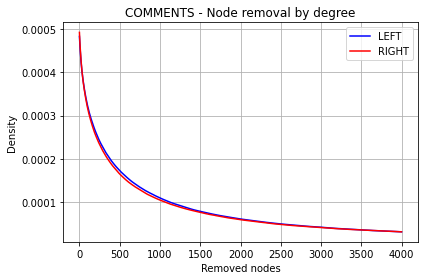

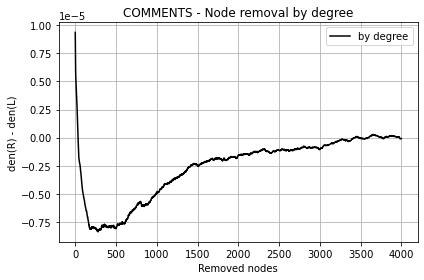

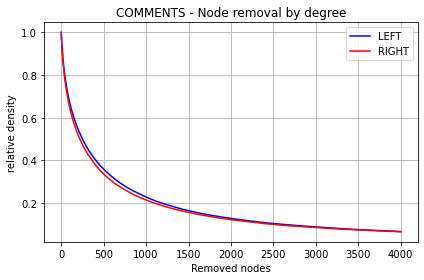

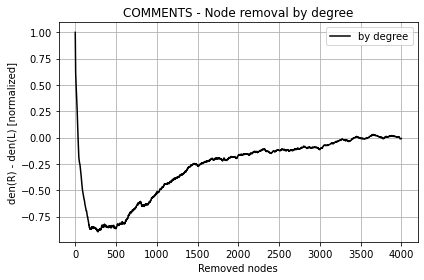

Now executing node removal according to hate_index...
Removing  0 / 753
Removing  0 / 1447
Removing  1000 / 1447


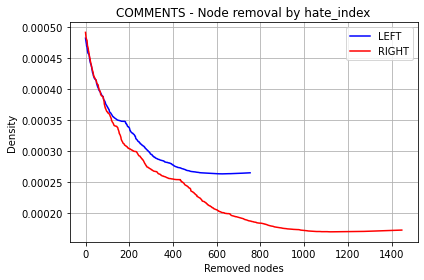

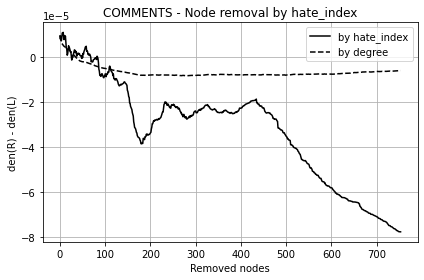

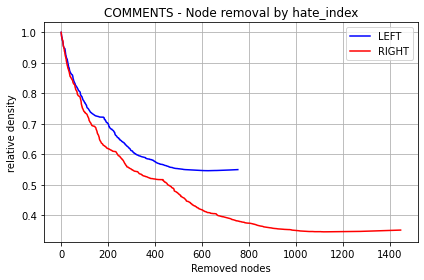

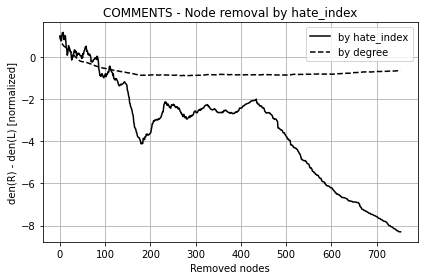

Now executing node removal according to positive_index...
Removing  0 / 20627
Removing  1000 / 20627
Removing  2000 / 20627
Removing  3000 / 20627
Removing  4000 / 20627
Removing  5000 / 20627
Removing  6000 / 20627
Removing  7000 / 20627
Removing  8000 / 20627
Removing  9000 / 20627
Removing  10000 / 20627
Removing  11000 / 20627
Removing  12000 / 20627
Removing  13000 / 20627
Removing  14000 / 20627
Removing  15000 / 20627
Removing  16000 / 20627
Removing  17000 / 20627
Removing  18000 / 20627
Removing  19000 / 20627
Removing  20000 / 20627
Removing  0 / 15021
Removing  1000 / 15021
Removing  2000 / 15021
Removing  3000 / 15021
Removing  4000 / 15021
Removing  5000 / 15021
Removing  6000 / 15021
Removing  7000 / 15021
Removing  8000 / 15021
Removing  9000 / 15021
Removing  10000 / 15021
Removing  11000 / 15021
Removing  12000 / 15021
Removing  13000 / 15021
Removing  14000 / 15021
Removing  15000 / 15021


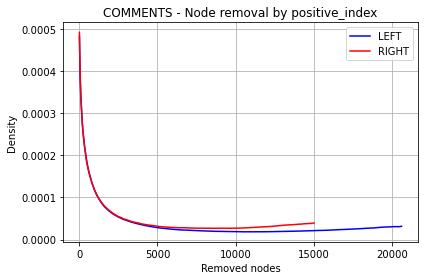

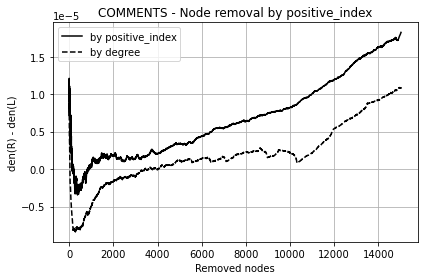

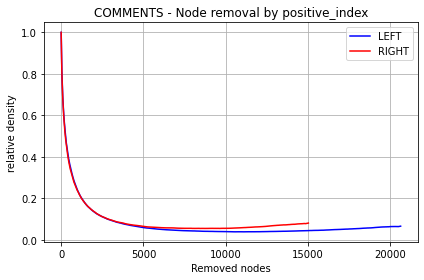

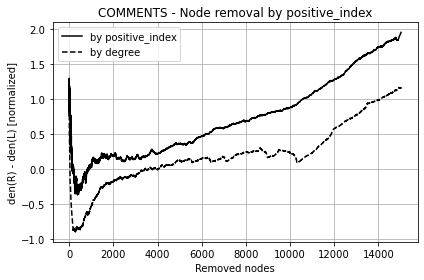

Now executing node removal according to problematic_index...
Removing  0 / 6633
Removing  1000 / 6633
Removing  2000 / 6633
Removing  3000 / 6633
Removing  4000 / 6633
Removing  5000 / 6633
Removing  6000 / 6633
Removing  0 / 7129
Removing  1000 / 7129
Removing  2000 / 7129
Removing  3000 / 7129
Removing  4000 / 7129
Removing  5000 / 7129
Removing  6000 / 7129
Removing  7000 / 7129


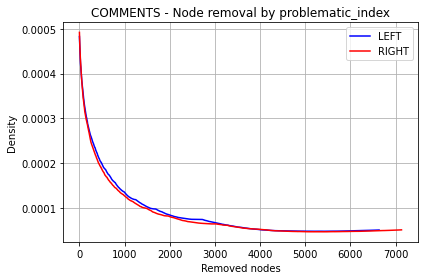

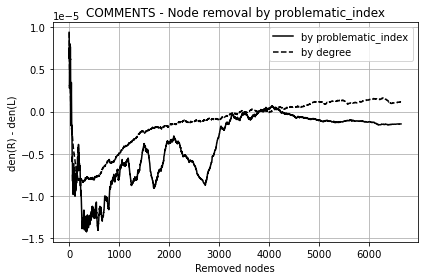

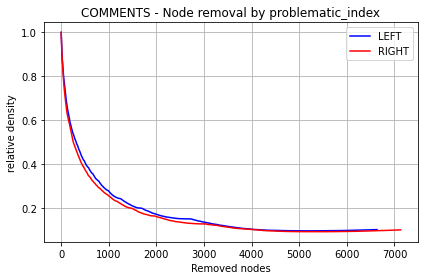

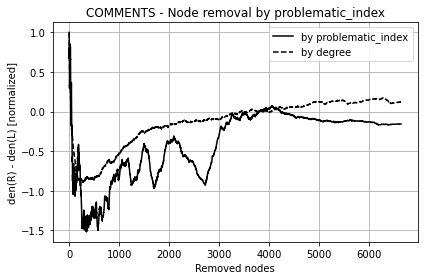

Now executing node removal according to polarity...
Removing  0 / 9943
Removing  1000 / 9943
Removing  2000 / 9943
Removing  3000 / 9943
Removing  4000 / 9943
Removing  5000 / 9943
Removing  6000 / 9943
Removing  7000 / 9943
Removing  8000 / 9943
Removing  9000 / 9943
Removing  0 / 8265
Removing  1000 / 8265
Removing  2000 / 8265
Removing  3000 / 8265
Removing  4000 / 8265
Removing  5000 / 8265
Removing  6000 / 8265
Removing  7000 / 8265
Removing  8000 / 8265


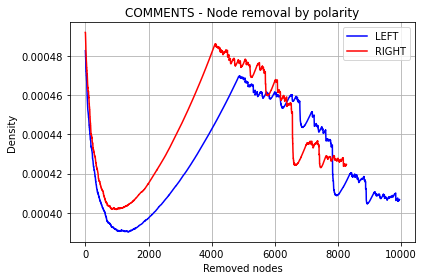

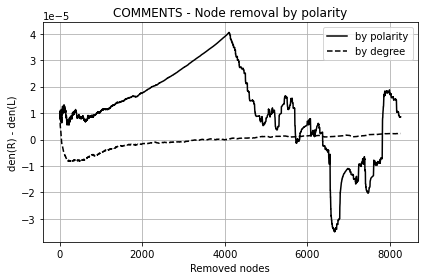

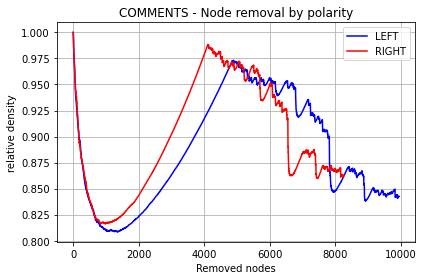

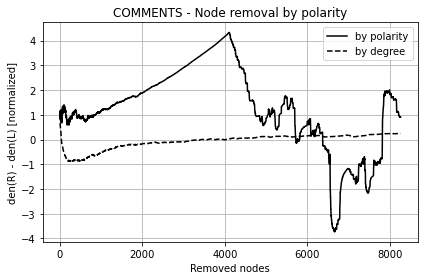

Now executing node removal according to polarity*degree...
Removing  0 / 9943
Removing  1000 / 9943
Removing  2000 / 9943
Removing  3000 / 9943
Removing  4000 / 9943
Removing  5000 / 9943
Removing  6000 / 9943
Removing  7000 / 9943
Removing  8000 / 9943
Removing  9000 / 9943
Removing  0 / 8265
Removing  1000 / 8265
Removing  2000 / 8265
Removing  3000 / 8265
Removing  4000 / 8265
Removing  5000 / 8265
Removing  6000 / 8265
Removing  7000 / 8265
Removing  8000 / 8265


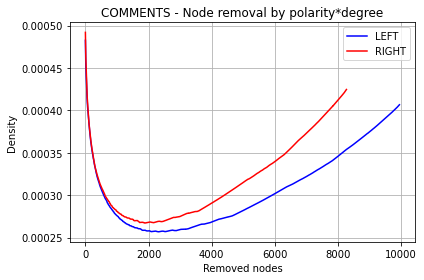

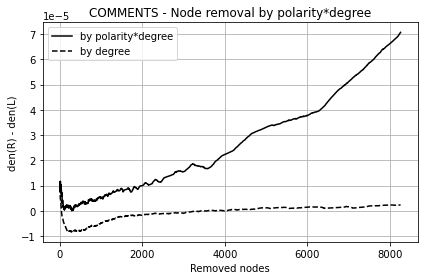

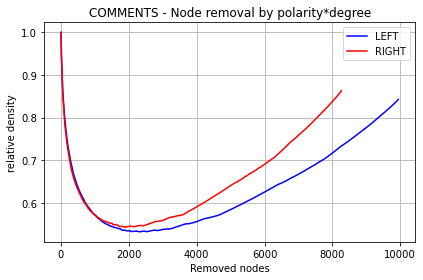

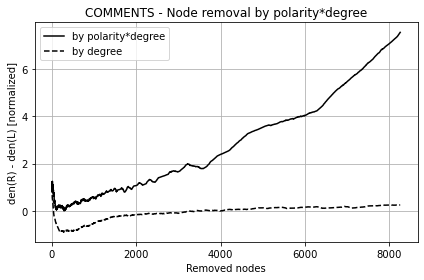

In [74]:
def node_removal_easy(G_L, G_R):
    
    number_removed_degree = 16000 
    
    ##########################
    ###### Using Degree ######
    ##########################

    #Left posts degree
    degree_dict_L = dict(G_L.degree(G_L.nodes()))
    nx.set_node_attributes(G_L, degree_dict_L, 'degree')
    sorted_degree_L = sorted(degree_dict_L.items(), key=itemgetter(1), reverse=True)
    labels_dict_L   = nx.get_node_attributes(G_L,'label')
    hate_index_dict_L = nx.get_node_attributes(G_L,'counts_hate')
    sorted_hate_index_L = sorted(hate_index_dict_L.items(), key=itemgetter(1), reverse=True)
    hate_polar_dict_L = nx.get_node_attributes(G_L,'polarity')
    sorted_hate_polar_L = sorted(hate_polar_dict_L.items(), key=itemgetter(1), reverse=False)
    pos_dict_L = nx.get_node_attributes(G_L,'counts_pos')
    sorted_pos_L = sorted(pos_dict_L.items(), key=itemgetter(1), reverse=True)
    
        
    #Right posts degree
    degree_dict_R = dict(G_R.degree(G_R.nodes()))
    nx.set_node_attributes(G_R, degree_dict_R, 'degree')
    sorted_degree_R = sorted(degree_dict_R.items(), key=itemgetter(1), reverse=True)
    labels_dict_R   = nx.get_node_attributes(G_R,'label')
    hate_index_dict_R = nx.get_node_attributes(G_R,'counts_hate')
    sorted_hate_index_R = sorted(hate_index_dict_R.items(), key=itemgetter(1), reverse=True)
    hate_polar_dict_R = nx.get_node_attributes(G_R,'polarity')
    sorted_hate_polar_R = sorted(hate_polar_dict_R.items(), key=itemgetter(1), reverse=False)
    pos_dict_R = nx.get_node_attributes(G_R,'counts_pos')
    sorted_pos_R = sorted(pos_dict_R.items(), key=itemgetter(1), reverse=True)
    
    print("Now executing node removal according to degree...")

    #Here we select the nodes and sort them by degree
    selected_nodes_L = list(sorted_degree_L)[:number_removed_degree]
    nodes_removed_L = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i][0])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_L           = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L    = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L)) #returns an error 
        nodes_rem_L.append(i+1)
    
    #Here we select the nodes and sort them by degree
    selected_nodes_R = list(sorted_degree_R)[:number_removed_degree]
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_R           = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R    = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R)) #returns an error 
        nodes_rem_R.append(i+1)
        
    get_graph_node_removal(list_density_L[:4000], list_density_R[:4000], 'degree')
    
    list_diff_degree = [x-y for x,y in zip(list_density_R, list_density_L)]
    
    ############################
    ###### Using hate index ####
    ############################
    
    print("Now executing node removal according to hate_index...")
    
    selected_nodes_L = [x for x in sorted_hate_index_L if x[1] > 0 ]
    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)

    #Using hate index
    selected_nodes_R = [x for x in sorted_hate_index_R if x[1] > 0 ]
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        nodes_removed_L, nodes_removed_R,
                                        G_L, G_R,
                                        'counts_hate')
    
    get_graph_node_removal(list_density_L, list_density_R, 'hate_index', list_diff_degree)

    ################################
    ###### Using positive index ####
    ################################
    
    print("Now executing node removal according to positive_index...")
    
    selected_nodes_L = [x for x in sorted_pos_L if x[1] > 0 ]
    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)

    #Using hate index
    selected_nodes_R = [x for x in sorted_pos_R if x[1] > 0 ]
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        nodes_removed_L, nodes_removed_R,
                                        G_L, G_R,
                                        'counts_pos')
    
    get_graph_node_removal(list_density_L, list_density_R, 'positive_index', list_diff_degree)
    
    #####################################
    ###### Using problematic_index ######
    #####################################
    
    prob_index_dict_L = nx.get_node_attributes(G_L,'counts_prob')
    sorted_prob_index_L = sorted(prob_index_dict_L.items(), key=itemgetter(1), reverse=True)
    prob_index_dict_R = nx.get_node_attributes(G_R,'counts_prob')
    sorted_prob_index_R = sorted(prob_index_dict_R.items(), key=itemgetter(1), reverse=True)
    
    print("Now executing node removal according to problematic_index...")
    
    selected_nodes_L = [x for x in sorted_prob_index_L if x[1] > 0 ]
    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)

    #Using hate index
    selected_nodes_R = [x for x in sorted_prob_index_R if x[1] > 0 ]
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        nodes_removed_L, nodes_removed_R,
                                        G_L, G_R,
                                        'counts_prob')
    
    get_graph_node_removal(list_density_L, list_density_R, 'problematic_index', list_diff_degree)
    
    ############################
    ###### Using polarity ######
    ############################
    
    print("Now executing node removal according to polarity...")

    selected_nodes_L = [x for x in sorted_hate_polar_L if x[1] < 0 ]
    
#     selected_nodes_middle_L = [x for x in sorted_hate_polar_L if x[1] < 0 and x[1] > -1 ]
#     selected_nodes_least_L  = [x for x in sorted_hate_polar_L if x[1] == -1 ]
# #     selected_nodes_least_L = random.sample(selected_nodes_least_L, len(selected_nodes_least_L))
#     selected_nodes_L = selected_nodes_least_L + selected_nodes_middle_L

    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L):
        nodes_removed_L.append(selected_nodes_L[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)

    selected_nodes_R = [x for x in sorted_hate_polar_R if x[1] < 0 ]
    
#     selected_nodes_middle_R = [x for x in sorted_hate_polar_R if x[1] < 0 and x[1] > -1 ]
#     selected_nodes_least_R  = [x for x in sorted_hate_polar_R if x[1] == -1 ]
# #     selected_nodes_least_R = random.sample(selected_nodes_least_R, len(selected_nodes_least_R))
#     selected_nodes_R = selected_nodes_least_R + selected_nodes_middle_R
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        nodes_removed_L, nodes_removed_R,
                                        G_L, G_R,
                                        'polarity')
    
    get_graph_node_removal(list_density_L, list_density_R, 'polarity', list_diff_degree)
    
    ###################################
    ###### Using polarity*degree ######
    ###################################
    
    print("Now executing node removal according to polarity*degree...")
    
    pol_degree_nodes_L        = [(x[0],x[1]*degree_dict_L.get(x[0])) for x in sorted_hate_polar_L if x[1] < 0 ]
    pol_degree_nodes_sorted_L = sorted(pol_degree_nodes_L, key=lambda tup: tup[1], reverse = False)
    selected_nodes_L = list(pol_degree_nodes_sorted_L) 
    nodes_removed_L = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)

        
    pol_degree_nodes_R        = [(x[0],x[1]*degree_dict_R.get(x[0])) for x in sorted_hate_polar_R if x[1] < 0 ]
    pol_degree_nodes_sorted_R = sorted(pol_degree_nodes_R, key=lambda tup: tup[1], reverse = False)
    selected_nodes_R = list(pol_degree_nodes_sorted_R) 
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
           
    get_graph_node_removal(list_density_L, list_density_R, 'polarity*degree', list_diff_degree)
    
    return list_diff_degree
    
degree_diff_list = node_removal_easy(G_L, G_R)

Now executing node removal according to Emo_Neg...
Removing  0 / 641
Removing  0 / 531


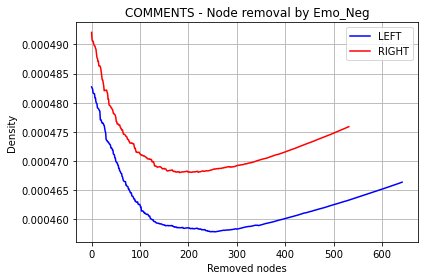

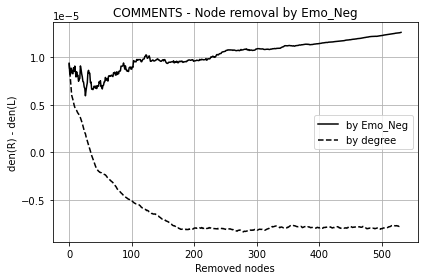

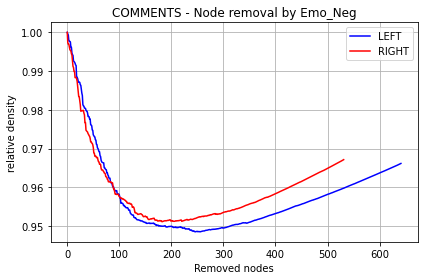

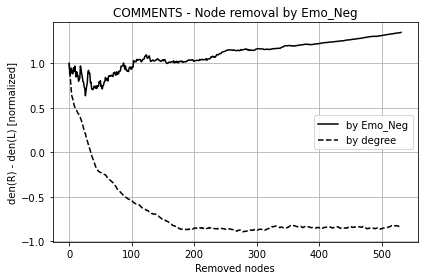

Now executing node removal according to Ansia...
Removing  0 / 88
Removing  0 / 74


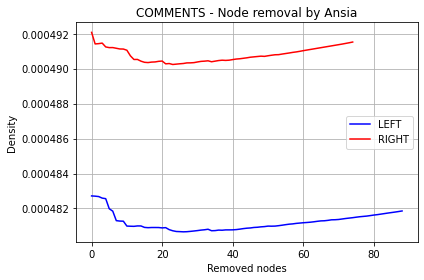

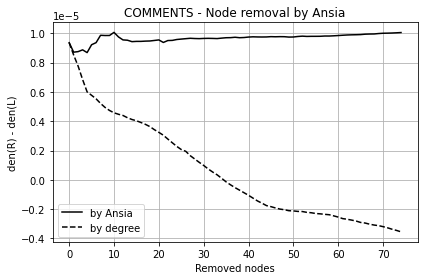

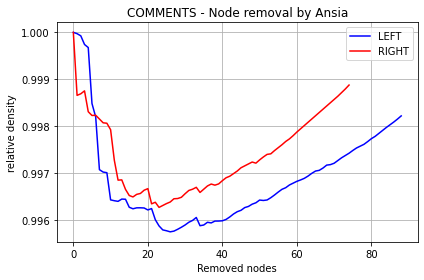

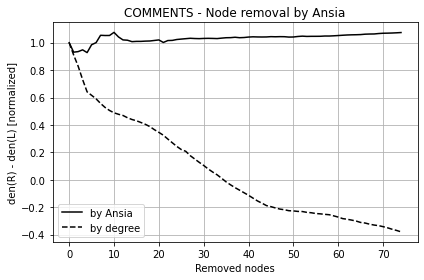

Now executing node removal according to Rabbia...
Removing  0 / 293
Removing  0 / 242


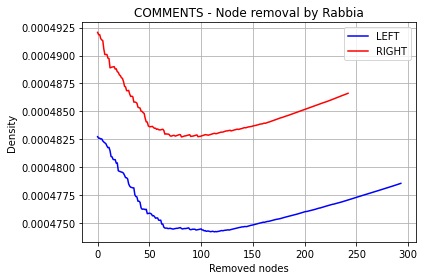

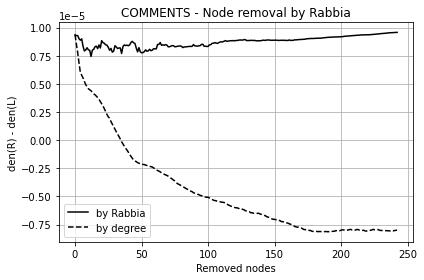

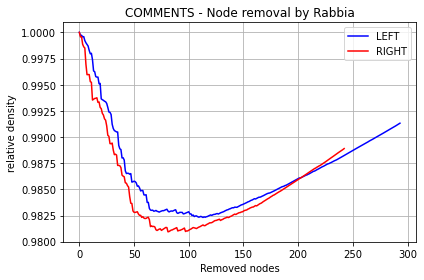

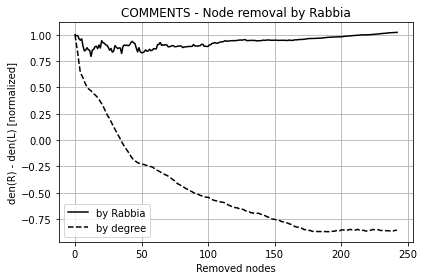

Now executing node removal according to Tristez...
Removing  0 / 121
Removing  0 / 106


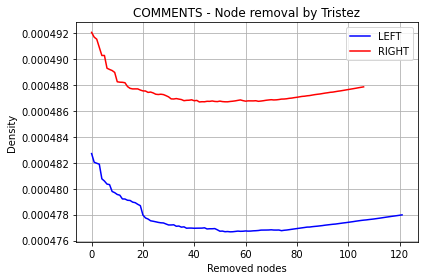

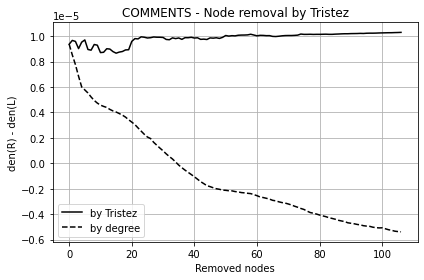

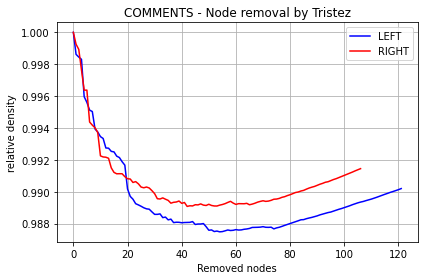

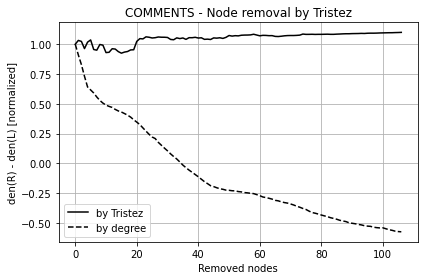

Now executing node removal according to parolac...
Removing  0 / 50
Removing  0 / 36


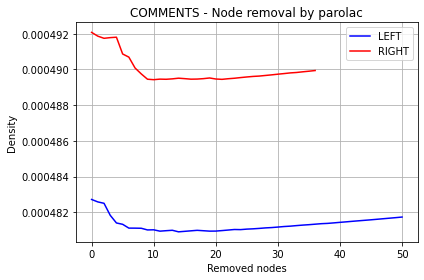

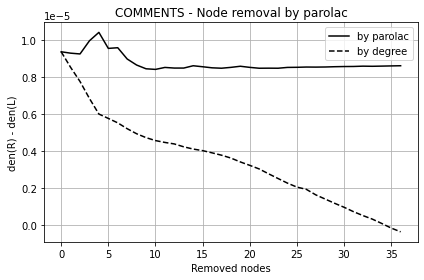

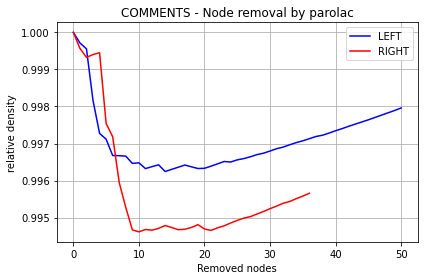

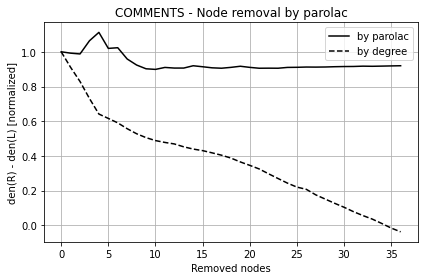

In [75]:
def node_removal_LIWC(G_L, G_R, degree_diff_list = None, degree_order = True):
    
    #Left posts degree
    dict_degree_L = dict(G_L.degree(G_L.nodes()))
    nx.set_node_attributes(G_L, dict_degree_L, 'degree')
    sorted_degree_L = sorted(dict_degree_L.items(), key=itemgetter(1), reverse=True)
    dict_label_L  = nx.get_node_attributes(G_L,'label')
    
    #Right posts degree
    dict_degree_R = dict(G_R.degree(G_R.nodes()))
    nx.set_node_attributes(G_R, dict_degree_R, 'degree')
    sorted_degree_R = sorted(dict_degree_R.items(), key=itemgetter(1), reverse=True)
    dict_label_R   = nx.get_node_attributes(G_R,'label')

    ##########################
    ###### Using Emo_Neg #####
    ##########################
    
    print("Now executing node removal according to Emo_Neg...")
    
    #LEFT SUBSET
    Emo_Neg_index_dict_L   = nx.get_node_attributes(G_L,'Emo_Neg')
    sorted_Emo_Neg_index_L = sorted(Emo_Neg_index_dict_L.items(), key=itemgetter(1), reverse=True)
    
    selected_Emo_Neg_L      = [x[0] for x in sorted_Emo_Neg_index_L if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_L = {x:dict_degree_L[x] for x in dict_degree_L if x in selected_Emo_Neg_L}
        sorted_degree_L = sorted(survivors_degree_L.items(), key=itemgetter(1), reverse=True)
        selected_Emo_Neg_L      = [x[0] for x in sorted_Emo_Neg_index_L if x[1] == 100.0]
    else:
        selected_Emo_Neg_L  = random.sample(selected_Emo_Neg_L, len(selected_Emo_Neg_L))
    selected_nodes_L = selected_Emo_Neg_L.copy()

    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L):
        nodes_removed_L.append(selected_nodes_L[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)
    
    #RIGHT SUBSET
    Emo_Neg_index_dict_R   = nx.get_node_attributes(G_R,'Emo_Neg')
    sorted_Emo_Neg_index_R = sorted(Emo_Neg_index_dict_R.items(), key=itemgetter(1), reverse=True)
    
    selected_Emo_Neg_R      = [x[0] for x in sorted_Emo_Neg_index_R if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_R = {x:dict_degree_R[x] for x in dict_degree_R if x in selected_Emo_Neg_R}
        sorted_degree_R = sorted(survivors_degree_R.items(), key=itemgetter(1), reverse=True)
        selected_Emo_Neg_R      = [x[0] for x in sorted_Emo_Neg_index_R if x[1] == 100.0]
    else:
        selected_Emo_Neg_R  = random.sample(selected_Emo_Neg_R, len(selected_Emo_Neg_R))
    selected_nodes_R = selected_Emo_Neg_R.copy()
    
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        selected_nodes_L, selected_nodes_R,
                                        G_L, G_R,
                                        'Emo_Neg')
    
    get_graph_node_removal(list_density_L, list_density_R, 'Emo_Neg',degree_diff_list)
    
    ##########################
    ###### Using Ansia #######
    ##########################
    
    print("Now executing node removal according to Ansia...")
    
    #LEFT SUBSET
    Ansia_index_dict_L   = nx.get_node_attributes(G_L,'Ansia')
    sorted_Ansia_index_L = sorted(Ansia_index_dict_L.items(), key=itemgetter(1), reverse=True)
    
    selected_Ansia_L      = [x[0] for x in sorted_Ansia_index_L if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_L = {x:dict_degree_L[x] for x in dict_degree_L if x in selected_Ansia_L}
        sorted_degree_L = sorted(survivors_degree_L.items(), key=itemgetter(1), reverse=True)
        selected_Ansia_L      = [x[0] for x in sorted_Ansia_index_L if x[1] == 100.0]
    else:
        selected_Ansia_L  = random.sample(selected_Ansia_L, len(selected_Ansia_L))
        
    selected_nodes_L  = selected_Ansia_L.copy()
    nodes_removed_L   = []
    for i,v in enumerate(selected_nodes_L):
        nodes_removed_L.append(selected_nodes_L[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)
    
    #RIGHT SUBSET
    Ansia_index_dict_R   = nx.get_node_attributes(G_R,'Ansia')
    sorted_Ansia_index_R = sorted(Ansia_index_dict_R.items(), key=itemgetter(1), reverse=True)
    
    selected_Ansia_R      = [x[0] for x in sorted_Ansia_index_R if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_R = {x:dict_degree_R[x] for x in dict_degree_R if x in selected_Ansia_R}
        sorted_degree_R = sorted(survivors_degree_R.items(), key=itemgetter(1), reverse=True)
        selected_Ansia_R      = [x[0] for x in sorted_Ansia_index_R if x[1] == 100.0]
    else:
        selected_Ansia_R  = random.sample(selected_Ansia_R, len(selected_Ansia_R))
    selected_nodes_R  = selected_Ansia_R.copy()
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        selected_nodes_L, selected_nodes_R,
                                        G_L, G_R,
                                        'Ansia')
    get_graph_node_removal(list_density_L, list_density_R, 'Ansia',degree_diff_list)
    
    
    ###########################
    ###### Using Rabbia #######
    ###########################
    
    print("Now executing node removal according to Rabbia...")
    
    #LEFT SUBSET
    Rabbia_index_dict_L   = nx.get_node_attributes(G_L,'Rabbia')
    sorted_Rabbia_index_L = sorted(Rabbia_index_dict_L.items(), key=itemgetter(1), reverse=True)
    
    selected_Rabbia_L      = [x[0] for x in sorted_Rabbia_index_L if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_L = {x:dict_degree_L[x] for x in dict_degree_L if x in selected_Rabbia_L}
        sorted_degree_L = sorted(survivors_degree_L.items(), key=itemgetter(1), reverse=True)
        selected_Rabbia_L      = [x[0] for x in sorted_Rabbia_index_L if x[1] == 100.0]
    else:
        selected_Rabbia_L  = random.sample(selected_Rabbia_L, len(selected_Rabbia_L))
    selected_nodes_L  = selected_Rabbia_L.copy()

    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L):
        nodes_removed_L.append(selected_nodes_L[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)
    
    #RIGHT SUBSET
    Rabbia_index_dict_R   = nx.get_node_attributes(G_R,'Rabbia')
    sorted_Rabbia_index_R = sorted(Rabbia_index_dict_R.items(), key=itemgetter(1), reverse=True)
    
    selected_Rabbia_R      = [x[0] for x in sorted_Rabbia_index_R if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_R = {x:dict_degree_R[x] for x in dict_degree_R if x in selected_Rabbia_R}
        sorted_degree_R = sorted(survivors_degree_R.items(), key=itemgetter(1), reverse=True)
        selected_Rabbia_R      = [x[0] for x in sorted_Rabbia_index_R if x[1] == 100.0]
    else:
        selected_Rabbia_R  = random.sample(selected_Rabbia_R, len(selected_Rabbia_R))
    selected_nodes_R  = selected_Rabbia_R.copy()
    
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        selected_nodes_L, selected_nodes_R,
                                        G_L, G_R,
                                        'Rabbia')
    
    get_graph_node_removal(list_density_L, list_density_R, 'Rabbia', degree_diff_list)
    
    
    ############################
    ###### Using Tristez #######
    ############################
    
    print("Now executing node removal according to Tristez...")
        #LEFT SUBSET
    Tristez_index_dict_L   = nx.get_node_attributes(G_L,'Tristez')
    sorted_Tristez_index_L = sorted(Tristez_index_dict_L.items(), key=itemgetter(1), reverse=True)
    
    selected_Tristez_L      = [x[0] for x in sorted_Tristez_index_L if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_L = {x:dict_degree_L[x] for x in dict_degree_L if x in selected_Tristez_L}
        sorted_degree_L = sorted(survivors_degree_L.items(), key=itemgetter(1), reverse=True)
        selected_Tristez_L      = [x[0] for x in sorted_Tristez_index_L if x[1] == 100.0]
    else:
        selected_Tristez_L  = random.sample(selected_Tristez_L, len(selected_Tristez_L))
    selected_nodes_L = selected_Tristez_L.copy()

    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L):
        nodes_removed_L.append(selected_nodes_L[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)
    
    #RIGHT SUBSET
    Tristez_index_dict_R   = nx.get_node_attributes(G_R,'Tristez')
    sorted_Tristez_index_R = sorted(Tristez_index_dict_R.items(), key=itemgetter(1), reverse=True)
    
    selected_Tristez_R      = [x[0] for x in sorted_Tristez_index_R if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_R = {x:dict_degree_R[x] for x in dict_degree_R if x in selected_Tristez_R}
        sorted_degree_R = sorted(survivors_degree_R.items(), key=itemgetter(1), reverse=True)
        selected_Tristez_R      = [x[0] for x in sorted_Tristez_index_R if x[1] == 100.0]
    else:
        selected_Tristez_R  = random.sample(selected_Tristez_R, len(selected_Tristez_R))
    selected_nodes_R = selected_Tristez_R.copy()
    
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        selected_nodes_L, selected_nodes_R,
                                        G_L, G_R, 
                                        'Tristez')
        
    get_graph_node_removal(list_density_L, list_density_R, 'Tristez', degree_diff_list)
    
    ############################
    ###### Using parolac #######
    ############################
    
    print("Now executing node removal according to parolac...")
    
    #LEFT SUBSET
    parolac_index_dict_L   = nx.get_node_attributes(G_L,'parolac')
    sorted_parolac_index_L = sorted(parolac_index_dict_L.items(), key=itemgetter(1), reverse=True)
    
    selected_parolac_L      = [x[0] for x in sorted_parolac_index_L if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_L = {x:dict_degree_L[x] for x in dict_degree_L if x in selected_parolac_L}
        sorted_degree_L = sorted(survivors_degree_L.items(), key=itemgetter(1), reverse=True)
        selected_parolac_L      = [x[0] for x in sorted_parolac_index_L if x[1] == 100.0]
    else:
        selected_parolac_L  = random.sample(selected_parolac_L, len(selected_parolac_L))
    selected_nodes_L = selected_parolac_L.copy()

    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L):
        nodes_removed_L.append(selected_nodes_L[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)
    
    #RIGHT SUBSET
    parolac_index_dict_R   = nx.get_node_attributes(G_R,'parolac')
    sorted_parolac_index_R = sorted(parolac_index_dict_R.items(), key=itemgetter(1), reverse=True)
    
    selected_parolac_R      = [x[0] for x in sorted_parolac_index_R if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_R = {x:dict_degree_R[x] for x in dict_degree_R if x in selected_parolac_R}
        sorted_degree_R = sorted(survivors_degree_R.items(), key=itemgetter(1), reverse=True)
        selected_parolac_R      = [x[0] for x in sorted_parolac_index_R if x[1] == 100.0]
    else:
        selected_parolac_R  = random.sample(selected_parolac_R, len(selected_parolac_R))
    selected_nodes_R = selected_parolac_R.copy()
    
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        selected_nodes_L, selected_nodes_R,
                                        G_L, G_R, 
                                        'parolac')
    get_graph_node_removal(list_density_L, list_density_R, 'parolac', degree_diff_list)
    
node_removal_LIWC(G_L, G_R, degree_diff_list)

Now executing node removal according to Total Negativity...
Removing  0 / 654
Removing  0 / 544


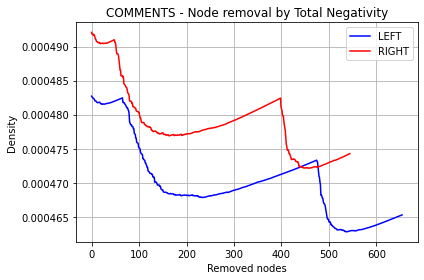

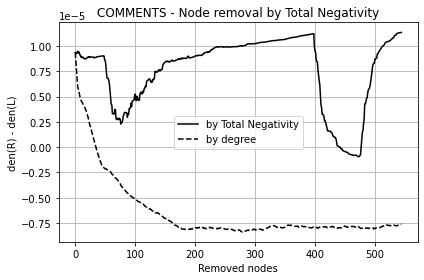

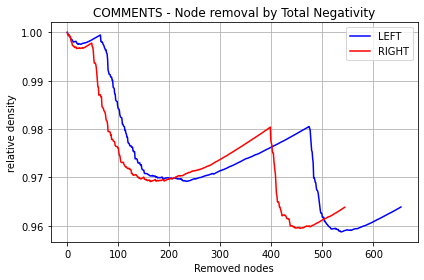

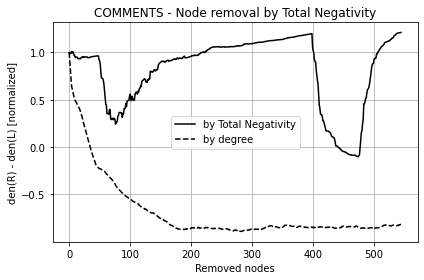

In [76]:
def node_total_negativity(G_L, G_R, degree_diff_list = None):
    
    ###########################
    ###### Using Tot_Neg ######
    ###########################
    
    
    #Left posts degree
    degree_dict_L = dict(G_L.degree(G_L.nodes()))
    nx.set_node_attributes(G_L, degree_dict_L, 'degree')
    sorted_degree_L = sorted(degree_dict_L.items(), key=itemgetter(1), reverse=True)
    tot_neg_dict_L   = nx.get_node_attributes(G_L,'Tot_Neg')
    sorted_tot_neg_L = sorted(tot_neg_dict_L.items(), key=itemgetter(1), reverse=True)
    dict_label_L = nx.get_node_attributes(G_L,'label')
    
    #Right posts degree
    degree_dict_R = dict(G_R.degree(G_R.nodes()))
    nx.set_node_attributes(G_R, degree_dict_R, 'degree')
    sorted_degree_R = sorted(degree_dict_R.items(), key=itemgetter(1), reverse=True)
    tot_neg_dict_R   = nx.get_node_attributes(G_R,'Tot_Neg')
    sorted_tot_neg_R = sorted(tot_neg_dict_R.items(), key=itemgetter(1), reverse=True)
    dict_label_R = nx.get_node_attributes(G_R,'label')
    
    print("Now executing node removal according to Total Negativity...")

    #Here we select the nodes and sort them by totalnegativity
    selected_nodes_L = [x[0] for x in sorted_tot_neg_L if x[1] != 0.0]
    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_L           = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L    = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L)) #returns an error 
        nodes_rem_L.append(i+1)
    
    #Here we select the nodes and sort them by totalnegativity
    selected_nodes_R = [x[0] for x in sorted_tot_neg_R if x[1] != 0.0]
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_R           = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R    = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R)) #returns an error 
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        selected_nodes_L, selected_nodes_R,
                                        G_L, G_R,
                                        'Tot_Neg')
    
    get_graph_node_removal(list_density_L, list_density_R, 'Total Negativity', degree_diff_list)

node_total_negativity(G_L, G_R, degree_diff_list)

# Relative hate

Now executing node removal according to Relative Hate index...
Removing  0 / 753
Removing  0 / 1447
Removing  1000 / 1447


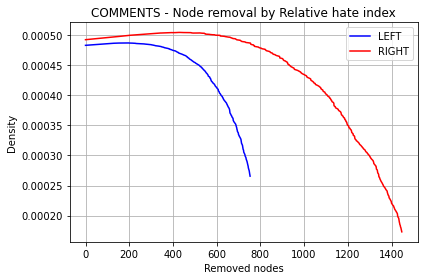

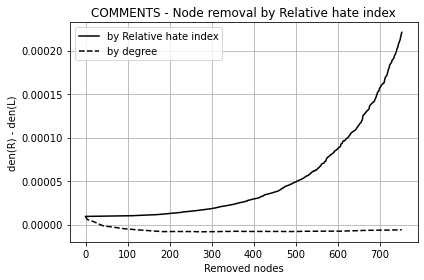

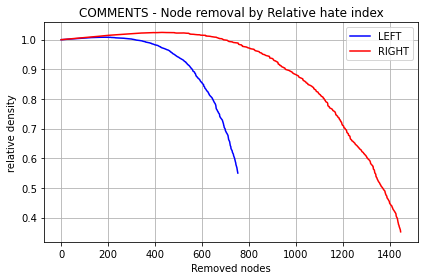

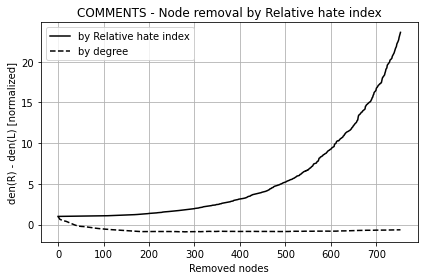

In [77]:
def node_total_relative_hate(G_L, G_R, degree_diff_list = None):
    
    ###########################
    ###### Using Rel_hate ######
    ###########################
    
    
    #Left posts degree
    degree_dict_L = dict(G_L.degree(G_L.nodes()))
    nx.set_node_attributes(G_L, degree_dict_L, 'degree')
    sorted_degree_L = sorted(degree_dict_L.items(), key=itemgetter(1), reverse=True)
    Rel_hate_dict_L   = nx.get_node_attributes(G_L,'Rel_hate')
    sorted_Rel_hate_L = sorted(Rel_hate_dict_L.items(), key=itemgetter(1), reverse=True)
    dict_label_L = nx.get_node_attributes(G_L,'label')
    
    #Right posts degree
    degree_dict_R = dict(G_R.degree(G_R.nodes()))
    nx.set_node_attributes(G_R, degree_dict_R, 'degree')
    sorted_degree_R = sorted(degree_dict_R.items(), key=itemgetter(1), reverse=True)
    Rel_hate_dict_R   = nx.get_node_attributes(G_R,'Rel_hate')
    sorted_Rel_hate_R = sorted(Rel_hate_dict_R.items(), key=itemgetter(1), reverse=True)
    dict_label_R = nx.get_node_attributes(G_R,'label')
    
    print("Now executing node removal according to Relative Hate index...")

    #Here we select the nodes and sort them by totalnegativity
    selected_nodes_L = [x[0] for x in sorted_Rel_hate_L if x[1] > 0.0]
    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_L           = G_L.copy()
    list_density_L = [nx.density(G1_L)]
    nodes_rem_L    = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L)) #returns an error 
        nodes_rem_L.append(i+1)
    
    #Here we select the nodes and sort them by totalnegativity
    selected_nodes_R = [x[0] for x in sorted_Rel_hate_R if x[1] > 0.0]
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_R           = G_R.copy()
    list_density_R = [nx.density(G1_R)]
    nodes_rem_R    = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R)) #returns an error 
        nodes_rem_R.append(i+1)
    
    write_dataframe_LR_density_timestep(list_density_L, list_density_R,
                                        selected_nodes_L, selected_nodes_R,
                                        G_L, G_R,
                                        'Rel_hate')
    
    get_graph_node_removal(list_density_L, list_density_R, 'Relative hate index', degree_diff_list)
    
node_total_relative_hate(G_L, G_R, degree_diff_list)

In [78]:
#left
degree_dict_L = dict(G_L.degree(G_L.nodes()))
labels_dict   = nx.get_node_attributes(G_L,'label')
hate_index_dict = nx.get_node_attributes(G_L,'counts_hate')
sorted_hate_index = sorted(hate_index_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by hate_index in LEFT graph:")
for i, d in enumerate(sorted_hate_index[:20]):
    print(i,"-th node", d, labels_dict.get(d[0]), "  degree  ->", degree_dict_L.get(d[0]))

Top 20 nodes by hate_index in LEFT graph:
0 -th node (46, 12) italiano   degree  -> 1268
1 -th node (78, 10) sempre   degree  -> 1627
2 -th node (26, 9) merda   degree  -> 272
3 -th node (414, 9) paese   degree  -> 924
4 -th node (122, 8) politico   degree  -> 1515
5 -th node (1165, 8) vergognare   degree  -> 513
6 -th node (249, 7) cazzo   degree  -> 307
7 -th node (17, 6) salvini   degree  -> 1281
8 -th node (268, 6) italia   degree  -> 1231
9 -th node (379, 6) bene   degree  -> 1036
10 -th node (42, 6) vivere   degree  -> 403
11 -th node (536, 6) fascista   degree  -> 657
12 -th node (1028, 6) patrio   degree  -> 91
13 -th node (1304, 6) coglione   degree  -> 189
14 -th node (73, 6) feccia   degree  -> 71
15 -th node (3909, 6) islamico   degree  -> 96
16 -th node (132, 5) anno   degree  -> 1278
17 -th node (202, 5) fare   degree  -> 1598
18 -th node (237, 5) dire   degree  -> 1271
19 -th node (512, 5) volere   degree  -> 762


In [79]:
#right
degree_dict_R = dict(G_R.degree(G_R.nodes()))
labels_dict   = nx.get_node_attributes(G_R,'label')
hate_index_dict = nx.get_node_attributes(G_R,'counts_hate')
sorted_hate_index = sorted(hate_index_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by hate_index in RIGHT graph:")
for i, d in enumerate(sorted_hate_index[:20]):
    print(i,"-th node", d, labels_dict.get(d[0]), "  degree  ->", degree_dict_R.get(d[0]))

Top 20 nodes by hate_index in RIGHT graph:
0 -th node (122, 38) italia   degree  -> 1254
1 -th node (171, 30) paese   degree  -> 705
2 -th node (4, 27) casa   degree  -> 731
3 -th node (137, 25) merda   degree  -> 264
4 -th node (195, 23) fuori   degree  -> 355
5 -th node (59, 19) via   degree  -> 365
6 -th node (238, 18) bastardo   degree  -> 107
7 -th node (80, 16) sempre   degree  -> 1305
8 -th node (139, 16) italiano   degree  -> 1265
9 -th node (3098, 16) mare   degree  -> 165
10 -th node (1, 15) gente   degree  -> 603
11 -th node (15, 14) islamico   degree  -> 173
12 -th node (448, 13) bene   degree  -> 774
13 -th node (206, 13) quando   degree  -> 924
14 -th node (378, 12) coglione   degree  -> 175
15 -th node (285, 11) potere   degree  -> 854
16 -th node (390, 11) mettere   degree  -> 686
17 -th node (48, 11) dovere   degree  -> 556
18 -th node (190, 11) delinquere   degree  -> 292
19 -th node (430, 11) andare   degree  -> 712


# Absolute Hate counts variable

In [80]:
def GetKey(val, dictionary):
    for key, value in dictionary.items():
        if val == value:
            return key
    return -1

In [81]:
hate_counts_abs = {}

#iterate over both dataframes and add to dictionary a word if not present and set it "abs_hate_index" to 0
#update it according to values of both dictionary
for row in nodes_df_LEFT.iterrows():
    hate_counts_abs.setdefault(row[1].label,0)
    hate_counts_abs[row[1].label] += row[1].counts_hate
for row in nodes_df_RIGHT.iterrows():
    hate_counts_abs.setdefault(row[1].label,0)
    hate_counts_abs[row[1].label] += row[1].counts_hate
#create a dataframe using the dictionary above
abs_hate_counts_df = pd.DataFrame.from_dict(hate_counts_abs, orient = 'index').reset_index()
#rename the columns using variables label and absolute hate index
abs_hate_counts_df.columns = ['label', 'abs_hate_index']
#reorder the dataframe according to abs_hate_index and then take only positive values
abs_hate_counts_df.sort_values('abs_hate_index', ascending = False, inplace = True)
abs_hate_counts_df = abs_hate_counts_df[abs_hate_counts_df.loc[:,'abs_hate_index'] > 0]
abs_hate_counts_df

,label,abs_hate_index
268,italia,44
414,paese,39
26,merda,34
155,casa,30
46,italiano,28
...,...,...
1090,decidere,1
20769,eliminarvi,1
10634,bancomat,1
3631,senno,1


**Node Removal**

Now executing node removal according to Absolute Hate Index...
Removing  0 / 1911
Removing  1000 / 1911


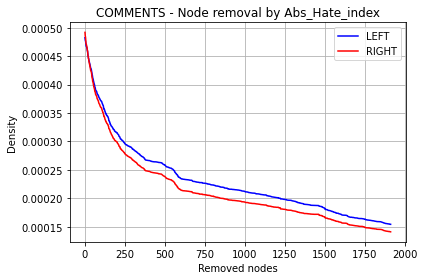

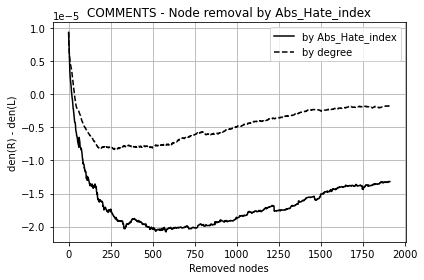

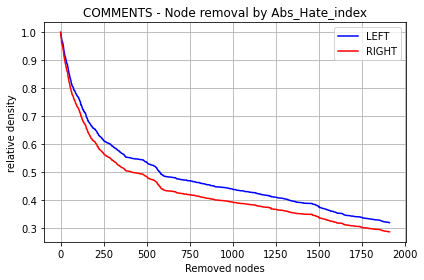

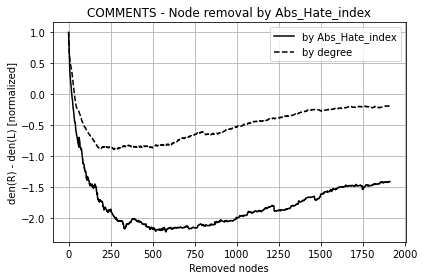

In [82]:
#Left posts degree
degree_dict_L = dict(G_L.degree(G_L.nodes()))
nx.set_node_attributes(G_L, degree_dict_L, 'degree')
sorted_degree_L = sorted(degree_dict_L.items(), key=itemgetter(1), reverse=True)
dict_label_L = nx.get_node_attributes(G_L,'label')
    
#Right posts degree
degree_dict_R = dict(G_R.degree(G_R.nodes()))
nx.set_node_attributes(G_R, degree_dict_R, 'degree')
sorted_degree_R = sorted(degree_dict_R.items(), key=itemgetter(1), reverse=True)
dict_label_R = nx.get_node_attributes(G_R,'label')
    
print("Now executing node removal according to Absolute Hate Index...")

list_labels_to_remove = abs_hate_counts_df.label.tolist()

#Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
G1_L           = G_L.copy()
G1_R           = G_R.copy()

list_density_L = [nx.density(G1_L)]
list_density_R = [nx.density(G1_R)]

for i, word in enumerate(list_labels_to_remove):
    if (i % 1000 == 0):
        print("Removing ", i ,"/", len(list_labels_to_remove))
    
    #here retrieve the id for each of the dataframe
    key_L = GetKey(word, dict_label_L)
    key_R = GetKey(word, dict_label_R)
    
    if key_L in G1_L:
        G1_L.remove_node(key_L)
    if key_R in G1_R:
        G1_R.remove_node(key_R)
    
    list_density_L.append(nx.density(G1_L))
    list_density_R.append(nx.density(G1_R)) 

get_graph_node_removal(list_density_L, list_density_R, 'Abs_Hate_index', degree_diff_list)

# Absolute problematic variables

In [83]:
prob_counts_abs = {}

#iterate over both dataframes and add to dictionary a word if not present and set it "abs_prob_index" to 0
#update it according to values of both dictionary
for row in nodes_df_LEFT.iterrows():
    prob_counts_abs.setdefault(row[1].label,0)
    prob_counts_abs[row[1].label] += row[1].counts_prob
for row in nodes_df_RIGHT.iterrows():
    prob_counts_abs.setdefault(row[1].label,0)
    prob_counts_abs[row[1].label] += row[1].counts_prob
#create a dataframe using the dictionary above
abs_prob_counts_df = pd.DataFrame.from_dict(prob_counts_abs, orient = 'index').reset_index()
#rename the columns using variables label and absolute prob index
abs_prob_counts_df.columns = ['label', 'abs_prob_index']
#reorder the dataframe according to abs_prob_index and then take only positive values
abs_prob_counts_df.sort_values('abs_prob_index', ascending = False, inplace = True)
abs_prob_counts_df = abs_prob_counts_df[abs_prob_counts_df.loc[:,'abs_prob_index'] > 0]
abs_prob_counts_df

,label,abs_prob_index
46,italiano,448
268,italia,428
155,casa,300
17,salvini,276
202,fare,263
...,...,...
4750,stefania,1
36328,nellaue,1
52,ocvoltellano,1
7968,focalizzare,1


Now executing node removal according to Absolute prob Index...
Removing  0 / 10641
Removing  1000 / 10641
Removing  2000 / 10641
Removing  3000 / 10641
Removing  4000 / 10641
Removing  5000 / 10641
Removing  6000 / 10641
Removing  7000 / 10641
Removing  8000 / 10641
Removing  9000 / 10641
Removing  10000 / 10641


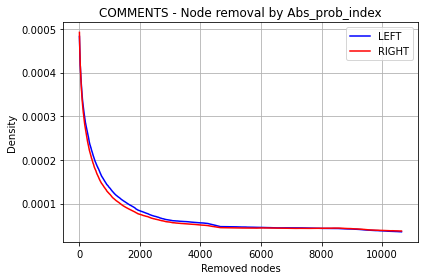

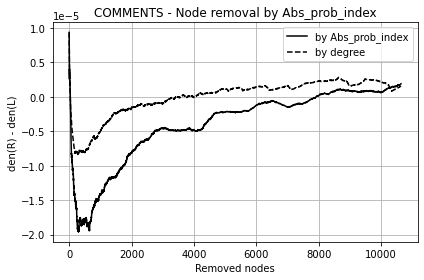

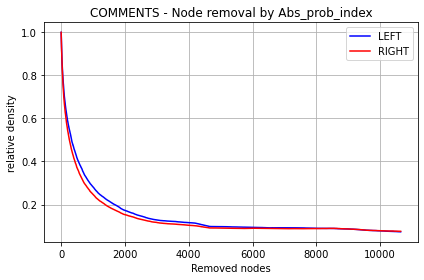

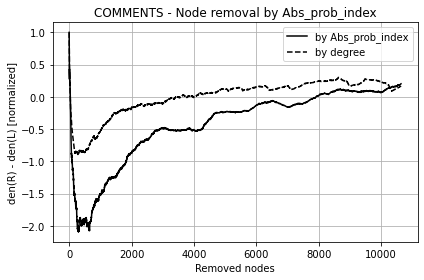

In [84]:
#Left posts degree
degree_dict_L = dict(G_L.degree(G_L.nodes()))
nx.set_node_attributes(G_L, degree_dict_L, 'degree')
sorted_degree_L = sorted(degree_dict_L.items(), key=itemgetter(1), reverse=True)
dict_label_L = nx.get_node_attributes(G_L,'label')
    
#Right posts degree
degree_dict_R = dict(G_R.degree(G_R.nodes()))
nx.set_node_attributes(G_R, degree_dict_R, 'degree')
sorted_degree_R = sorted(degree_dict_R.items(), key=itemgetter(1), reverse=True)
dict_label_R = nx.get_node_attributes(G_R,'label')
    
print("Now executing node removal according to Absolute prob Index...")

list_labels_to_remove = abs_prob_counts_df.label.tolist()

#Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
G1_L           = G_L.copy()
G1_R           = G_R.copy()

list_density_L = [nx.density(G1_L)]
list_density_R = [nx.density(G1_R)]

for i, word in enumerate(list_labels_to_remove):
    if (i % 1000 == 0):
        print("Removing ", i ,"/", len(list_labels_to_remove))
    
    #here retrieve the id for each of the dataframe
    key_L = GetKey(word, dict_label_L)
    key_R = GetKey(word, dict_label_R)
    
    #if the key (i.e. the node) is present, then remove it, otherwise do nothing
    #if we remove and it is not present, it raises an error
    if key_L in G1_L:
        G1_L.remove_node(key_L)
    if key_R in G1_R:
        G1_R.remove_node(key_R)
    
    list_density_L.append(nx.density(G1_L))
    list_density_R.append(nx.density(G1_R)) 

get_graph_node_removal(list_density_L, list_density_R, 'Abs_prob_index', degree_diff_list)

# Node removal analysis dynamics

**Polarity**

In [ ]:
hate_index   = pd.read_csv('dataframes_density/counts_hate.csv')
hate_index_L = hate_index.iloc[:,:5]
hate_index_R = hate_index.iloc[:,5:]

sns.pairplot(hate_index_L.iloc[:,2:5])

In [4]:
from scipy.stats.mstats import pearsonr
import scipy as sp

In [15]:
np.corrcoef(hate_index_L.degree_L, hate_index_L.attr_L)

array([[1.        , 0.59377917],
       [0.59377917, 1.        ]])

In [5]:
np.corrcoef(hate_index_L.delta_L, hate_index_L.attr_L)

array([[ 1.        , -0.61870341],
       [-0.61870341,  1.        ]])

In [12]:
hate_index_L.sort_values('delta_L').head(20)

,node_L,density_L,delta_L,degree_L,attr_L
1,sempre,0.000476,-0.000004,1627,10
17,fare,0.000451,-0.000004,1598,5
4,politico,0.000470,-0.000003,1515,8
81,partire,0.000385,-0.000003,1461,2
50,pd,0.000409,-0.000003,1427,3
28,quando,0.000433,-0.000003,1331,4
7,salvini,0.000465,-0.000003,1281,6
26,potere,0.000437,-0.000003,1288,4
16,anno,0.000454,-0.000003,1278,5
0,italiano,0.000480,-0.000003,1268,12


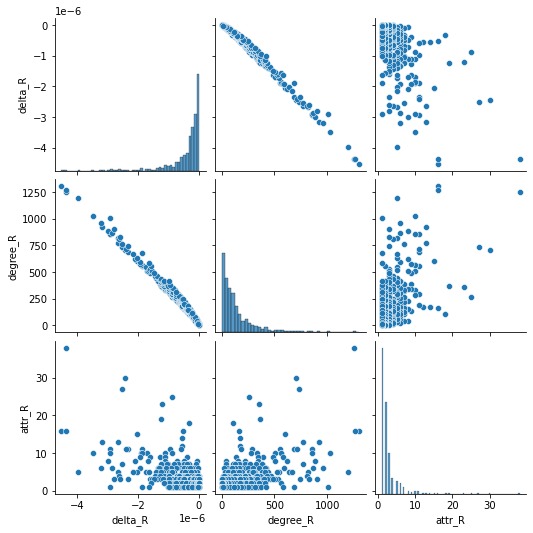

In [13]:
sns.pairplot(hate_index_R.iloc[:,2:5])

In [16]:
np.corrcoef(hate_index_R.degree_R, hate_index_R.attr_R)

array([[1.       , 0.5555559],
       [0.5555559, 1.       ]])

In [6]:
np.corrcoef(hate_index_R.delta_R, hate_index_R.attr_R)

array([[ 1.        , -0.60346725],
       [-0.60346725,  1.        ]])

In [14]:
hate_index_R.sort_values('delta_R').head(20)

,node_R,density_R,delta_R,degree_R,attr_R
7,sempre,0.000475,-0.000005,1305,16
8,italiano,0.000470,-0.000004,1265,16
0,italia,0.000488,-0.000004,1254,38
85,fare,0.000376,-0.000004,1197,5
21,salvini,0.000446,-0.000004,1024,10
68,anno,0.000392,-0.000003,964,6
13,quando,0.000461,-0.000003,924,13
36,dire,0.000422,-0.000003,886,8
15,potere,0.000458,-0.000003,854,11
481,politico,0.000236,-0.000003,1005,1


**Polarity**

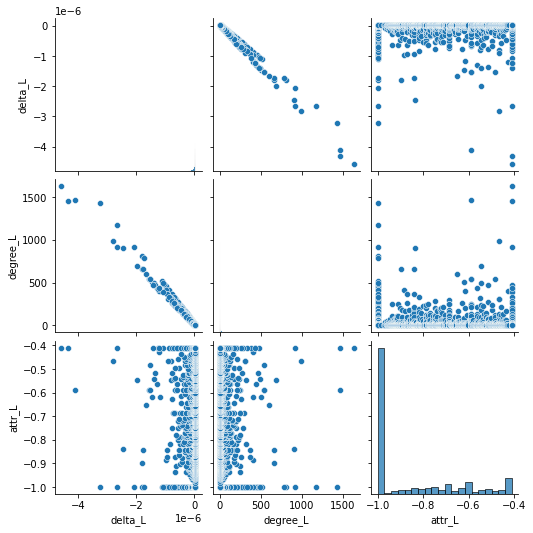

In [8]:
polarity   = pd.read_csv('dataframes_density/polarity.csv')
polarity_L = polarity.iloc[:,:5]
polarity_R = polarity.iloc[:,5:]

sns.pairplot(polarity_L.iloc[:,2:5])

In [20]:
np.corrcoef(polarity_L.degree_L, polarity_L.attr_L)

array([[1.        , 0.04436198],
       [0.04436198, 1.        ]])

In [9]:
np.corrcoef(polarity_L.delta_L, polarity_L.attr_L)

array([[ 1.        , -0.05428161],
       [-0.05428161,  1.        ]])

In [16]:
polarity_L.sort_values('delta_L').head(20)

,node_L,density_L,delta_L,degree_L,attr_L
7822,sempre,0.000422,-0.000005,1627,-0.409666
7820,parlare,0.000428,-0.000004,1458,-0.409666
6788,partire,0.000453,-0.000004,1461,-0.590334
11,pd,0.000475,-0.000003,1427,-1.000000
7608,diro,0.000439,-0.000003,991,-0.467500
7819,mettere,0.000432,-0.000003,919,-0.409666
5,lavorare,0.000479,-0.000003,1170,-1.000000
5371,europa,0.000460,-0.000002,906,-0.837846
43,sinistro,0.000465,-0.000002,918,-1.000000
7241,casa,0.000447,-0.000002,689,-0.547190


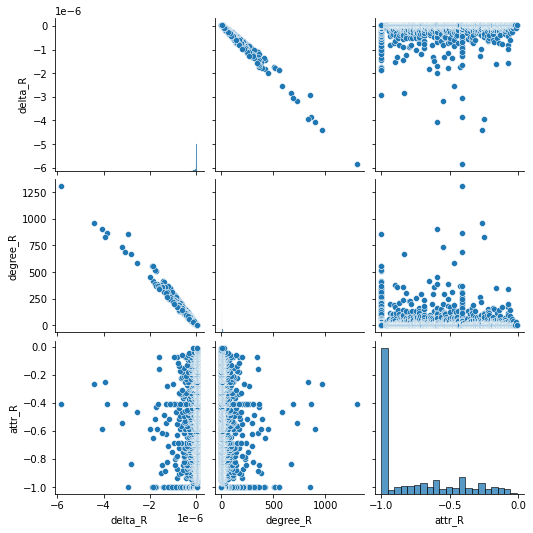

In [17]:
sns.pairplot(polarity_R.iloc[:,2:5])

In [21]:
np.corrcoef(polarity_R.degree_R, polarity_R.attr_R)

array([[1.        , 0.02155936],
       [0.02155936, 1.        ]])

In [10]:
np.corrcoef(polarity_R.delta_R, polarity_R.attr_R)

array([[ 1.        , -0.03089598],
       [-0.03089598,  1.        ]])

In [18]:
polarity_R.sort_values('delta_R').head(20)

,node_R,density_R,delta_R,degree_R,attr_R
6553,sempre,0.000446,-0.000006,1305,-0.409666
7398,anno,0.000430,-0.000004,964,-0.266136
5698,partire,0.000466,-0.000004,902,-0.590334
7411,votare,0.000425,-0.000004,830,-0.251332
6556,parlare,0.000438,-0.000004,865,-0.409666
6080,casa,0.000464,-0.000003,731,-0.547190
6555,mettere,0.000442,-0.000003,686,-0.409666
63,lavorare,0.000466,-0.000003,858,-1.000000
4546,europa,0.000478,-0.000003,671,-0.837846
6372,diro,0.000457,-0.000003,581,-0.467500


**Total Negativity**

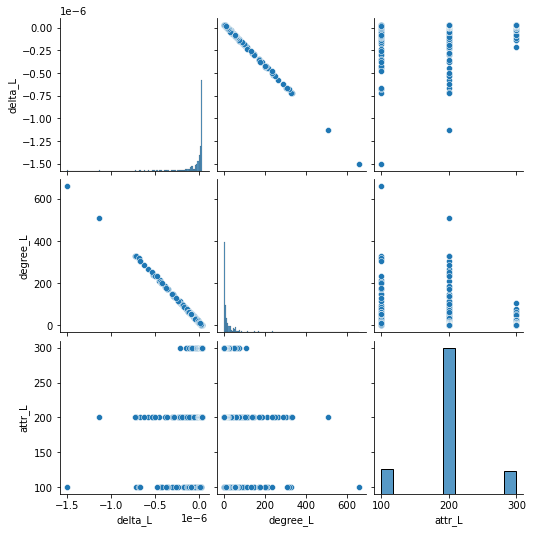

In [12]:
Tot_neg   = pd.read_csv('dataframes_density/Tot_Neg.csv')
Tot_neg_L = Tot_neg.iloc[:,:5]
Tot_neg_R = Tot_neg.iloc[:,5:]

sns.pairplot(Tot_neg_L.iloc[:,2:5])

In [13]:
np.corrcoef(Tot_neg_L.degree_L, Tot_neg_L.attr_L)

array([[ 1.        , -0.24837512],
       [-0.24837512,  1.        ]])

In [14]:
np.corrcoef(Tot_neg_L.delta_L, Tot_neg_L.attr_L)

array([[1.        , 0.24732809],
       [0.24732809, 1.        ]])

In [20]:
Tot_neg_L.sort_values('delta_L').head(20)

,node_L,density_L,delta_L,degree_L,attr_L
482,problema,0.000468,-1.501099e-06,660,100.0
79,perdere,0.000479,-1.131217e-06,509,200.0
132,solo,0.000470,-7.211513e-07,331,200.0
477,difendere,0.000472,-7.173164e-07,327,100.0
89,odiare,0.000477,-7.092702e-07,327,200.0
476,colpa,0.000472,-6.792543e-07,315,100.0
478,peggio,0.000471,-6.770732e-07,317,100.0
480,cazzo,0.000470,-6.677317e-07,307,100.0
65,inutile,0.000482,-6.639471e-07,304,200.0
107,schifare,0.000474,-6.178700e-07,287,200.0


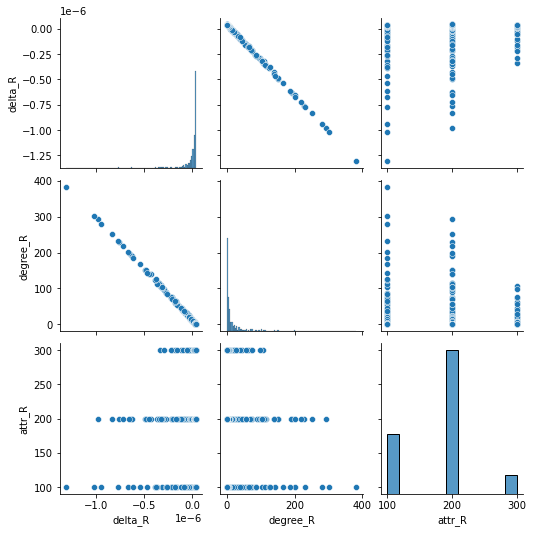

In [21]:
sns.pairplot(Tot_neg_R.iloc[:,2:5])

In [25]:
np.corrcoef(Tot_neg_R.degree_R, Tot_neg_R.attr_R)

array([[ 1.        , -0.07779424],
       [-0.07779424,  1.        ]])

In [15]:
np.corrcoef(Tot_neg_R.delta_R, Tot_neg_R.attr_R)

array([[1.       , 0.0788929],
       [0.0788929, 1.       ]])

In [22]:
Tot_neg_R.sort_values('delta_R').head(20)

,node_R,density_R,delta_R,degree_R,attr_R
398,problema,0.000481,-1.310401e-06,382,100.0
408,difendere,0.000477,-1.017409e-06,302,100.0
67,perdere,0.000485,-9.801527e-07,293,200.0
409,cazzo,0.000476,-9.448539e-07,280,100.0
61,schifare,0.000486,-8.347960e-07,252,200.0
404,colpa,0.000479,-7.696937e-07,232,100.0
51,odiare,0.000489,-7.632076e-07,228,200.0
79,solo,0.000482,-7.197110e-07,218,200.0
401,peggio,0.000480,-6.712997e-07,201,100.0
59,paura,0.000487,-6.580758e-07,200,200.0
